In [86]:
import numpy as np
import pandas as pd
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import cmath

cwd = os.getcwd()
sys.path.append(cwd+"/../handy_functions")

from concat_pickles import get_outputs,print_df
from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator

pal = sns.husl_palette(8)

data_folder = '/Users/kendranoneman/Projects/mayo/NeuralDecoding/runs/all_decoders'
fig_folder = '/Users/kendranoneman/Projects/mayo/NeuralDecoding/figures/grc'
df = get_outputs(data_folder,0)
df.head(1)

,sess,repeat,outer_fold,nMT,nFEF,model,mean_R2,mean_rho,mean_R2_null,mean_rho_null
0,16,0,0,24,24,0,-0.011687,-0.025916,-0.010374,-0.011118


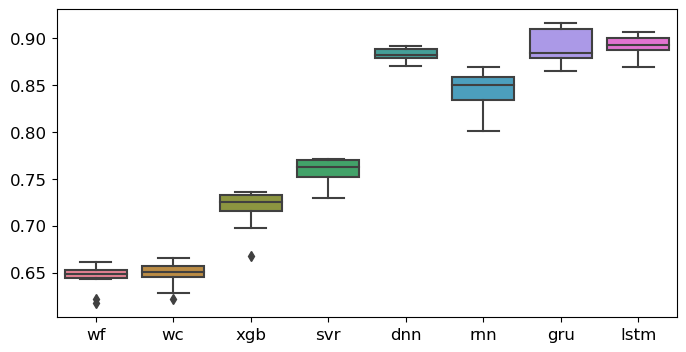

In [87]:
plt.rcParams.update({'font.size': 12})

fig, ax = plt.subplots(1,1, figsize=(8,4))

#'bad' sessions: 16
#'semi' sessions: 18,20,34,38
#'good' sessions: 19*,21,22,23*,24,25,27,28,29*,32,33,35
hue_plot_params = {'data':df.loc[df['sess']==29], 'x':'model', 'y':'mean_R2', 'palette':'husl'}
a = sns.boxplot(ax=ax, **hue_plot_params)
a.set_xticklabels(['wf','wc','xgb','svr','dnn','rnn','gru','lstm'], rotation=0)
        
a.set(xlabel=None)
a.set(ylabel=None)

fig.savefig(fig_folder+'/model_R2.png', dpi=600, bbox_inches='tight') 

[-500 -450 -400 -350 -300 -250 -200 -150 -100  -50    0   50  100  150
  200  250  300  350  400  450  500  550  600  650  700  750  800  850
  900  950 1000]


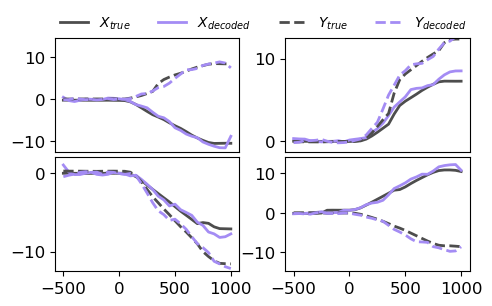

In [88]:
with open(data_folder+'/fold06-m6-eyetrace.pickle', 'rb') as f:
    y_test,y_test_predicted = pickle.load(f)
    
#plt.rcParams.update({'font.size': 14})
x = np.arange(0, 31*50, 50) - 500
print(x)
fig, axes = plt.subplots(2,2,figsize=(5,3))
fig.tight_layout()

start_end = [1272,1303]
axes[0,0].plot(x,y_test[start_end[0]:start_end[1],0], color=(0.3,0.3,0.3), linewidth=2, label='true (horizontal)')
axes[0,0].plot(x,y_test_predicted[start_end[0]:start_end[1],0], color=pal[6], linewidth=2, label='predicted (horizontal)')
axes[0,0].plot(x,y_test[start_end[0]:start_end[1],1], color=(0.3,0.3,0.3), linestyle='dashed', linewidth=2, label='true (vertical)')
axes[0,0].plot(x,y_test_predicted[start_end[0]:start_end[1],1], color=pal[6], linestyle='dashed', linewidth=2, label='predicted (vertical)')
axes[0,0].set_ylim(-12.5, 14.5)
axes[0,0].set_yticks([-10,0,10])
axes[0,0].set_xticks([])

start_end = [87,118] 
axes[0,1].plot(x,y_test[start_end[0]:start_end[1],0], color=(0.3,0.3,0.3), linewidth=2, label='$X_{true}$')
axes[0,1].plot(x,y_test_predicted[start_end[0]:start_end[1],0], color=pal[6], linewidth=2, label='$X_{decoded}$')
axes[0,1].plot(x,y_test[start_end[0]:start_end[1],1], color=(0.3,0.3,0.3), linestyle='dashed', linewidth=2, label='$Y_{true}$')
axes[0,1].plot(x,y_test_predicted[start_end[0]:start_end[1],1], color=pal[6], linestyle='dashed', linewidth=2, label='$Y_{decoded}$')
axes[0,1].set_ylim(-1.25, 12.5)
axes[0,1].set_yticks([0,10])
axes[0,1].set_xticks([])

start_end = [1047,1078] 
axes[1,0].plot(x,y_test[start_end[0]:start_end[1],0], color=(0.3,0.3,0.3), linewidth=2, label='true (horizontal)')
axes[1,0].plot(x,y_test_predicted[start_end[0]:start_end[1],0], color=pal[6], linewidth=2, label='predicted (horizontal)')
axes[1,0].plot(x,y_test[start_end[0]:start_end[1],1], color=(0.3,0.3,0.3), linestyle='dashed', linewidth=2, label='true (vertical)')
axes[1,0].plot(x,y_test_predicted[start_end[0]:start_end[1],1], color=pal[6], linestyle='dashed', linewidth=2, label='predicted (vertical)')
axes[1,0].set_ylim(-12.5,2)
axes[1,0].set_yticks([-10,0])
axes[1,0].set_xticks([-500,0,500,1000])

start_end = [184,215] 
axes[1,1].plot(x,y_test[start_end[0]:start_end[1],0], color=(0.3,0.3,0.3), linewidth=2, label='true (horizontal)')
axes[1,1].plot(x,y_test_predicted[start_end[0]:start_end[1],0], color=pal[6], linewidth=2, label='predicted (horizontal)')
axes[1,1].plot(x,y_test[start_end[0]:start_end[1],1], color=(0.3,0.3,0.3), linestyle='dashed', linewidth=2, label='true (vertical)')
axes[1,1].plot(x,y_test_predicted[start_end[0]:start_end[1],1], color=pal[6], linestyle='dashed', linewidth=2, label='predicted (vertical)')
axes[1,1].set_ylim(-14.75, 14)
axes[1,1].set_yticks([-10,0,10])
axes[1,1].set_xticks([-500,0,500,1000])

plt.subplots_adjust(wspace=0.25, hspace=0.05)

axes[0,1].legend(loc='lower center', bbox_to_anchor=(-0.12, 0.95),
          fancybox=False, shadow=False, ncol=4, fontsize="10",frameon=False)

fig.savefig(fig_folder+'/model_4traces.png', dpi=600, bbox_inches='tight') 

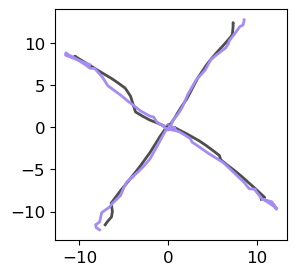

In [89]:
fig, axes = plt.subplots(1,1,figsize=(3,3))

start_end = [1272,1303]
axes.plot(y_test[start_end[0]:start_end[1],0],y_test[start_end[0]:start_end[1],1], color=(0.3,0.3,0.3), linewidth=2, label='true (horizontal)')
axes.plot(y_test_predicted[start_end[0]:start_end[1],0],y_test_predicted[start_end[0]:start_end[1],1], color=pal[6], linewidth=2, label='predicted (horizontal)')

start_end = [87,118] 
axes.plot(y_test[start_end[0]:start_end[1],0],y_test[start_end[0]:start_end[1],1], color=(0.3,0.3,0.3), linewidth=2, label='true (horizontal)')
axes.plot(y_test_predicted[start_end[0]:start_end[1],0],y_test_predicted[start_end[0]:start_end[1],1], color=pal[6], linewidth=2, label='predicted (horizontal)')

start_end = [1047,1078] 
axes.plot(y_test[start_end[0]:start_end[1],0],y_test[start_end[0]:start_end[1],1], color=(0.3,0.3,0.3), linewidth=2, label='true (horizontal)')
axes.plot(y_test_predicted[start_end[0]:start_end[1],0],y_test_predicted[start_end[0]:start_end[1],1], color=pal[6], linewidth=2, label='predicted (horizontal)')

start_end = [184,215] 
axes.plot(y_test[start_end[0]:start_end[1],0],y_test[start_end[0]:start_end[1],1], color=(0.3,0.3,0.3), linewidth=2, label='true (horizontal)')
axes.plot(y_test_predicted[start_end[0]:start_end[1],0],y_test_predicted[start_end[0]:start_end[1],1], color=pal[6], linewidth=2, label='predicted (horizontal)')

fig.savefig(fig_folder+'/model_stacktraces.png', dpi=600, bbox_inches='tight') 